In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Section 3.2: Generates the classes

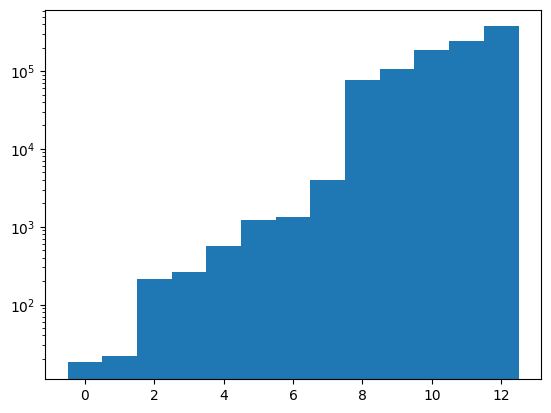

In [ ]:
b = 6
M = 13

u = np.random.uniform(0,1,M)*b
P = np.exp(np.log(b)*u)
P = np.sort(P/np.sum(P))

values = plt.hist(np.random.choice(M, 10**b, p=P), bins=[-0.5 + x for x in range(M+1)])
plt.yscale('log')
plt.show()

In [70]:
# Generates the CPMs
class CPM:
    def __init__(self, type: str, dimensions: int, freq: np.ndarray, additional_params):
        '''
        This object defines the mock classifiers truth table.\n
        The parameters are:\n
        type: str, defines the mock classifier type\n
            the options are: ['perfect',
                              'noisy',
                              'tunnel',
                              'subs',
                              'mutually_subs',
                              'cruise']
        dimensions: int, defines the number of classes given\n
        freq: np.ndarray, the frequency of each class\n
        additional_params: some types may require additional parameters\n
            noisy: noise (int)\n
            tunnel: (focus_class)\n
            subs: (true_class, coppied_classes*, noise)\n
            mutually_subs: [joined_classes*, noise]\n
            cruise: relevant (int)\n
            class = {0,1,...,dimension-1}
        '''
        self.type = type
        self.dimensions = dimensions
        self.freq = freq
        self.additional_params = additional_params

        self.CPM = np.zeros((dimensions, dimensions))
        self.__useful_CPM = np.zeros((dimensions, dimensions))
        self.__useful_type = ''
        self.__useful_additional_params = 0
        self.generate_CPM()

    def generate_CPM(self, mixandmatch=False, type='perfect', additional_params=0):
        '''
        This function generates the CPM according to the type\n\n
        if mixandmatch = True, then it won't change the self.CPM,\n
            but will return a generated CPM instead.
        '''
        if mixandmatch:
            self.__useful_CPM = self.CPM
            self.__useful_type = self.type
            self.__useful_additional_params = self.additional_params
            self.additional_params = additional_params
            self.type = type

        # Generates the perfect CPM
        if self.type == 'perfect':
            self.CPM = np.eye(self.dimensions)

        # Generates the noisy CPM
        elif self.type == 'noisy':
            noise = self.additional_params
            self.CPM = (np.eye(self.dimensions)*noise + np.ones((self.dimensions, self.dimensions))/self.dimensions)/(1+noise)

        # Generates the tunnel vision CPM
        elif self.type == 'tunnel':
            focus_index = self.additional_params
            self.CPM = np.zeros((self.dimensions, self.dimensions))
            for i in range(self.dimensions):
                if i == focus_index:
                    for j in range(self.dimensions):
                        self.CPM[i][j] = 1.0 if j == focus_index else 0.0
                else:
                    for j in range(self.dimensions):
                        self.CPM[i][j] = 1.0/self.dimensions if j != focus_index else 0.0

        # Generates the sbsummed type
        elif self.type == 'subs':
            true_index = self.additional_params[0]
            copy_classes = self.additional_params[0:-1]
            noise = self.additional_params[-1]
            self.CPM = np.zeros((self.dimensions, self.dimensions))
            for i in range(self.dimensions):
                if i in copy_classes:
                    for j in range(self.dimensions):
                        self.CPM[i][j] = 1.0 if j == true_index else 0.0
                else:
                    for j in range(self.dimensions):
                        self.CPM[i][j] = 1.0 if j == i else 0.0
            # Now we just add noise as before
            self.CPM = (self.CPM*noise + np.ones((self.dimensions, self.dimensions))/self.dimensions)/(1+noise)

        # Generates the mutually subsummed type
        elif self.type == 'mutually_subs':
            copy_classes = self.additional_params[0:-1]
            normalising_factor = len(copy_classes)
            noise = self.additional_params[-1]
            self.CPM = np.zeros((self.dimensions, self.dimensions))
            for i in range(self.dimensions):
                if i in copy_classes:
                    for j in range(self.dimensions):
                        self.CPM[i][j] = 1.0/normalising_factor if j in copy_classes else 0.0
                else:
                    for j in range(self.dimensions):
                        self.CPM[i][j] = 1.0 if j == i else 0.0
            # Now we just add noise as before
            self.CPM = (self.CPM*noise + np.ones((self.dimensions, self.dimensions))/self.dimensions)/(1+noise)

         # Generates the cruise control type
        elif self.type == 'cruise':
            relevant = self.additional_params
            self.CPM = np.zeros((self.dimensions, self.dimensions))
            for i in range(self.dimensions):
                self.CPM[i][relevant] = 1.0

        # The type doesnt exist
        else:
            raise ValueError(f'The type: "{self.type}" is not defined')

        # For the mixandmatch case
        if mixandmatch:
            output = self.CPM
            self.CPM = self.__useful_CPM
            self.type = self.__useful_type
            self.additional_params = self.__useful_additional_params
            return output

    def add_to_cpm(self, add_CPM):
        '''
        Adds a CPM to the current CPM
        '''
        self.CPM = np.add(self.CPM, add_CPM.CPM)

    def __str__(self):
        return str(self.CPM)




In [71]:
test_CPM = CPM('cruise', 5, np.ones(5)/5, 1)
print(np.sum(test_CPM.CPM[0]))
print(test_CPM)
print(test_CPM.generate_CPM(mixandmatch=True, type='noisy', additional_params=9))

1.0
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[[0.92 0.02 0.02 0.02 0.02]
 [0.02 0.92 0.02 0.02 0.02]
 [0.02 0.02 0.92 0.02 0.02]
 [0.02 0.02 0.02 0.92 0.02]
 [0.02 0.02 0.02 0.02 0.92]]
